<a href="https://colab.research.google.com/github/siddharthhkumar/data-analysis-project/blob/main/stock_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 FAANG+ Stock Analysis (2014-2024)
**Analyst:** Siddharth Kumar  
**Goal:** To analyze a decade of performance for the top 10 technology companies, focusing on growth, risk, and correlation. This project demonstrates skills in data extraction, cleaning, visualization, and financial analysis.

**Companies:** META (Facebook), AAPL (Apple), AMZN (Amazon), NFLX (Netflix), GOOGL (Google), MSFT (Microsoft), TSLA (Tesla), NVDA (NVIDIA), ADBE (Adobe), PYPL (PayPal)

In [1]:
# Install the data fetching library
!pip install yfinance

# Import all necessary tools
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For pretty plots
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [2]:
# Define the list of top 10 tech giants
# Removed PYPL as it was not publicly traded for the entire date range
faang_plus = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOGL', 'MSFT', 'TSLA', 'NVDA', 'ADBE']

# Set the date range for a decade
start_date = '2014-08-24'
end_date = '2024-08-24' # Adjust to recent date

# Download the data
print("Downloading historical stock data for 10 companies...")
stock_data = yf.download(faang_plus, start=start_date, end=end_date)

# Confirm download
print("Download complete!")
print(f"Data Shape: {stock_data['Close'].shape}")
stock_data['Close'].head(3)

/tmp/ipython-input-549750945.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(faang_plus, start=start_date, end=end_date)
[*********************100%***********************]  9 of 9 completed

Download complete!
Data Shape: (2517, 9)


Ticker,AAPL,ADBE,AMZN,GOOGL,META,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,,
2014-08-25,22.435116,71.820000,16.701000,29.352465,74.610680,38.333420,68.704285,0.456656,17.503332
2014-08-26,22.291494,71.529999,17.091499,29.230692,75.545547,38.197639,68.480003,0.464780,17.449333
2014-08-27,22.565470,71.550003,17.159000,28.976219,74.222809,38.078827,67.814285,0.459523,17.549999


In [3]:
# 1. Extract only the 'Close' prices for each day
closing_prices = stock_data['Close'].copy()

# 2. Check for missing values
print("Missing values per stock before cleaning:")
print(closing_prices.isnull().sum())

# 3. Forward-fill missing values (carry last known price forward, e.g., over weekends/holidays)
closing_prices.fillna(method='ffill', inplace=True)

# 4. Simple check to see if any missing values remain
print("\n✅ Missing values after cleaning:")
print(closing_prices.isnull().sum().sum()) # Should be 0

# 5. Let's see our clean dataset
closing_prices.tail()

Missing values per stock before cleaning:
Ticker
AAPL     0
ADBE     0
AMZN     0
GOOGL    0
META     0
MSFT     0
NFLX     0
NVDA     0
TSLA     0
dtype: int64

✅ Missing values after cleaning:
0


/tmp/ipython-input-223964225.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  closing_prices.fillna(method='ffill', inplace=True)


Ticker,AAPL,ADBE,AMZN,GOOGL,META,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,,
2024-08-19,224.843567,563.119995,178.220001,165.866531,527.473877,418.388916,688.530029,129.958923,222.720001
2024-08-20,225.460693,562.250000,178.880005,166.374054,524.932556,421.634583,698.539978,127.209816,221.100006
2024-08-21,225.351212,565.789978,180.110001,165.050491,533.333801,420.979492,697.119995,128.459412,223.270004
2024-08-22,223.489868,557.440002,176.130005,163.010361,530.114868,412.453461,688.960022,123.700920,210.660004
2024-08-23,225.789169,558.299988,177.039993,164.821579,526.198242,413.684265,686.729980,129.329132,220.320007


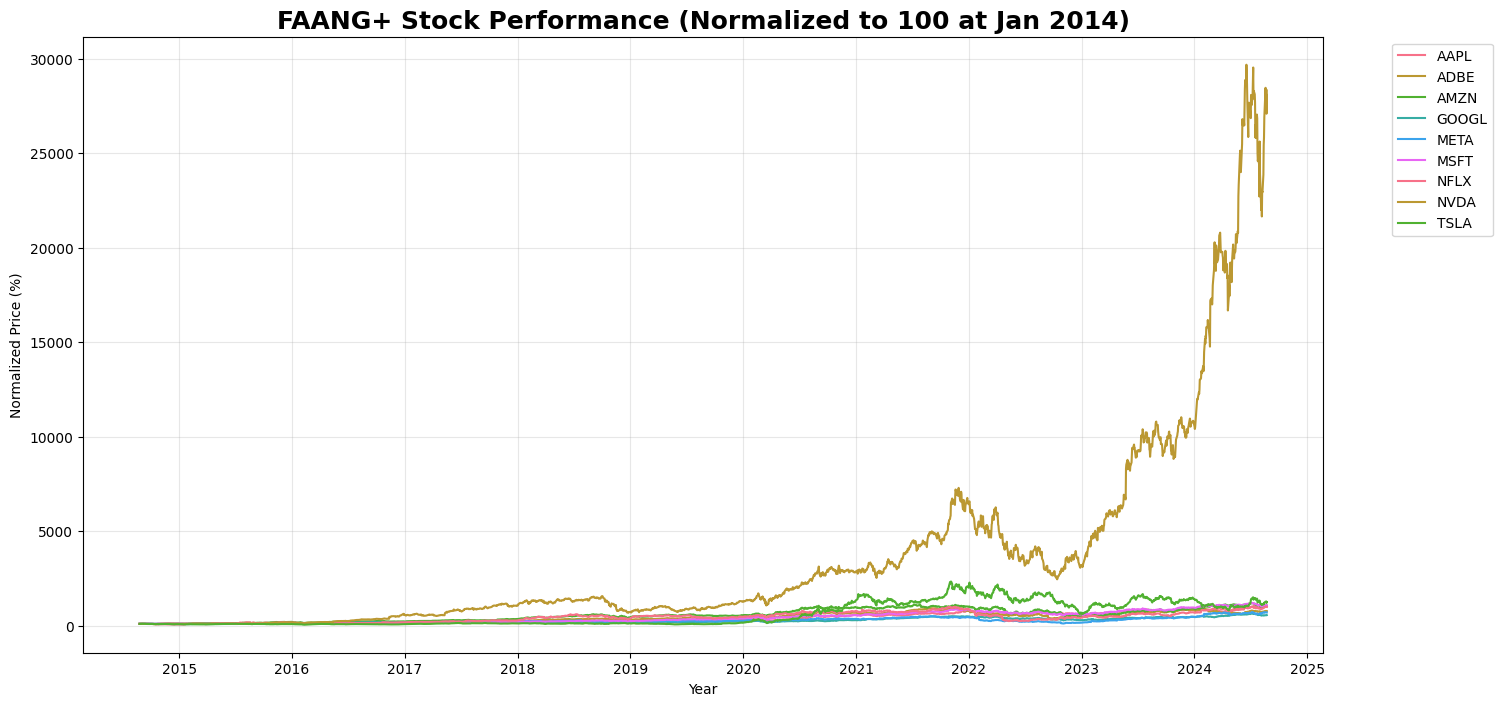

In [4]:
# Normalize prices to see relative growth compared to the start of 2014.
normalized_prices = (closing_prices / closing_prices.iloc[0]) * 100

plt.figure(figsize=(16, 8))
for company in normalized_prices.columns:
    plt.plot(normalized_prices.index, normalized_prices[company], label=company, linewidth=1.5)

plt.title('FAANG+ Stock Performance (Normalized to 100 at Jan 2014)', fontsize=18, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Normalized Price (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Puts legend outside the plot
plt.grid(True, alpha=0.3)
plt.show()

# Insight: Which stock grew the most? NVIDIA (NVDA) likely will be the top performer.

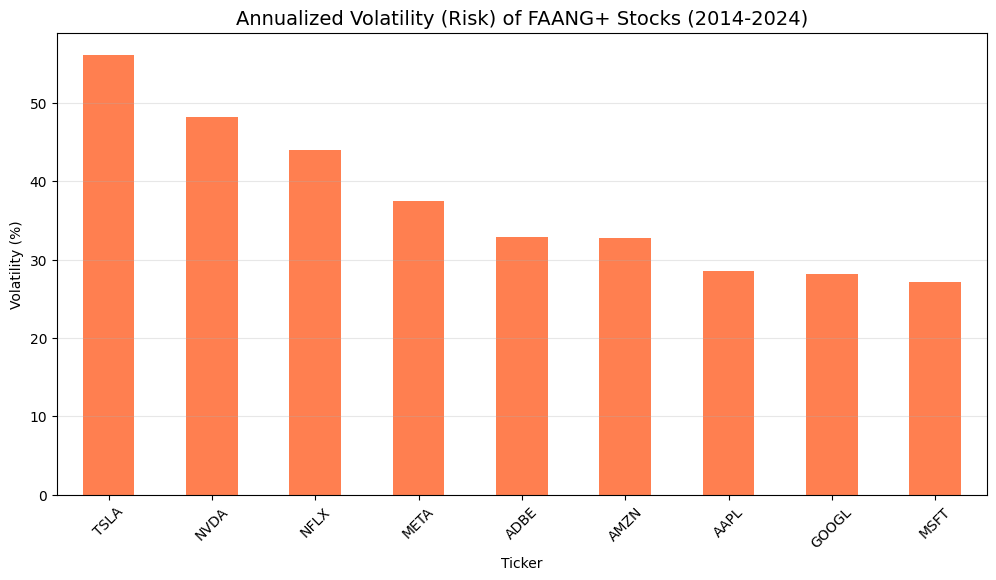

📊 Most Volatile Stocks:
Ticker
TSLA    56.132003
NVDA    48.155022
NFLX    44.013795
dtype: float64


In [5]:
# Calculate Daily Returns (% change day-to-day)
daily_returns = closing_prices.pct_change()

# Calculate Annualized Volatility (a standard risk metric)
# We assume 252 trading days in a year
volatility = daily_returns.std() * np.sqrt(252) * 100  # Convert to percentage

# Create a bar chart
plt.figure(figsize=(12, 6))
volatility.sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Annualized Volatility (Risk) of FAANG+ Stocks (2014-2024)', fontsize=14)
plt.ylabel('Volatility (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

print("📊 Most Volatile Stocks:")
print(volatility.sort_values(ascending=False).head(3))


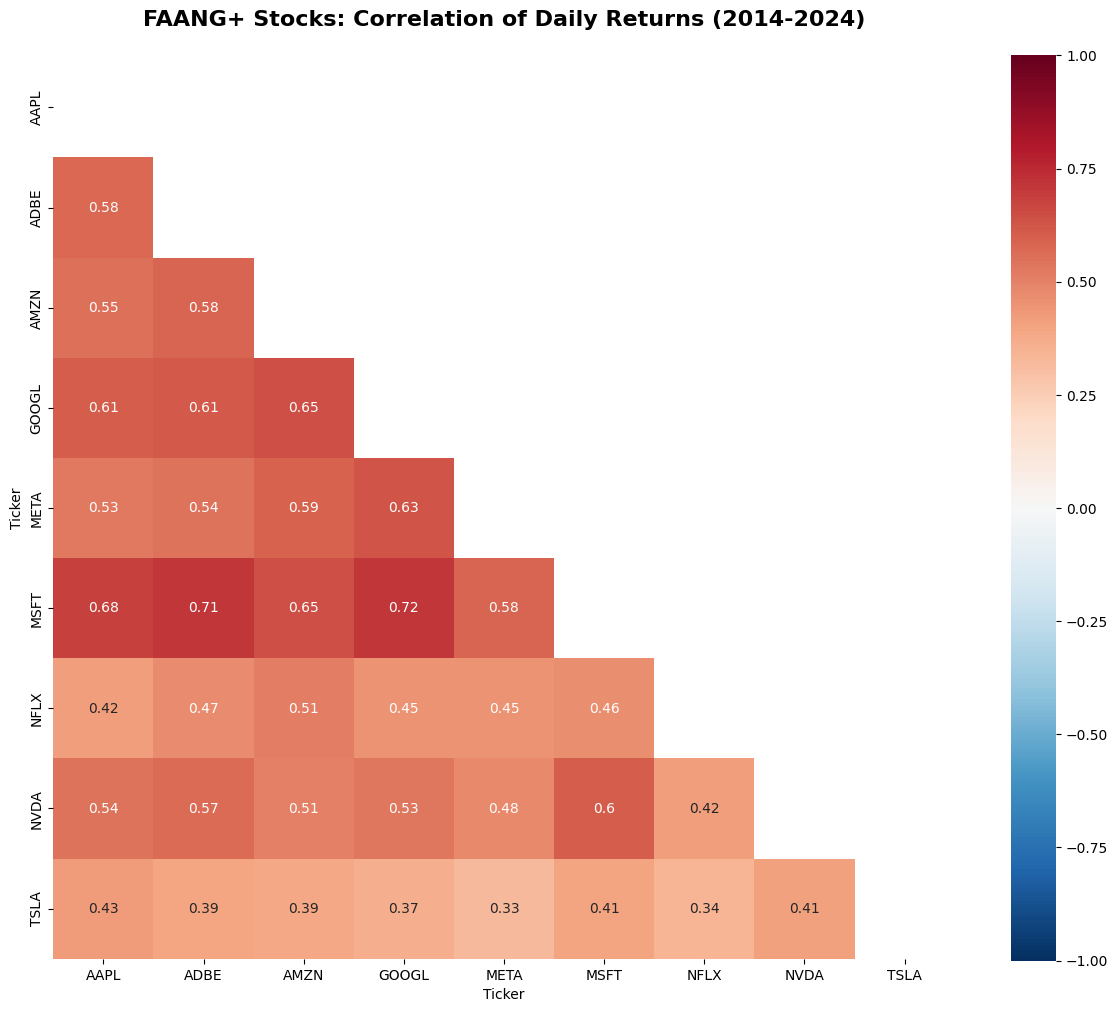

In [6]:
# Calculate the correlation matrix
corr_matrix = daily_returns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Mask the upper triangle for a cleaner look
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0, vmin=-1, vmax=1, square=True)
plt.title('FAANG+ Stocks: Correlation of Daily Returns (2014-2024)\n', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Insight: Most will be positively correlated. Are there any weak or negative correlations?

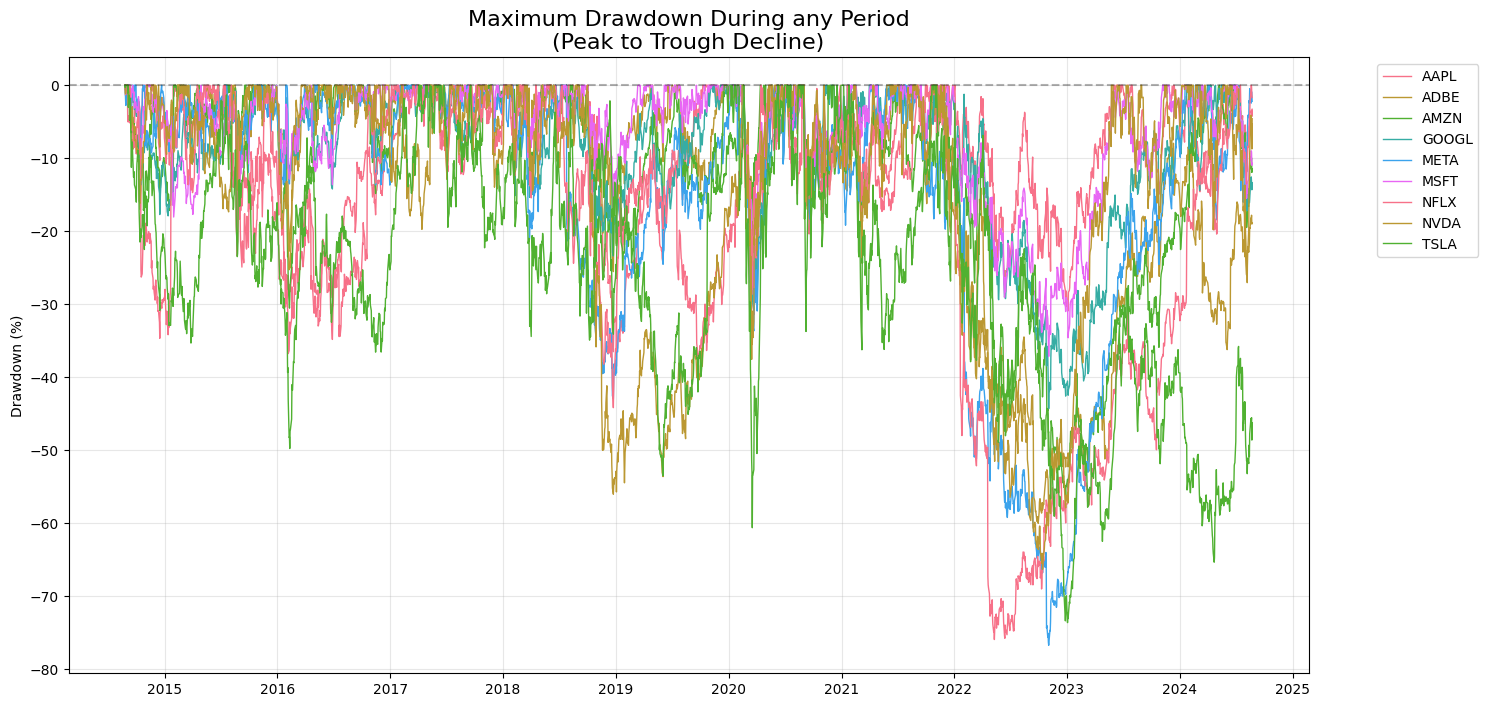

📉 Worst Peak-to-Trough Drop for Each Stock:
Ticker
META    -76.7
NFLX    -75.9
TSLA    -73.6
NVDA    -66.3
ADBE    -60.0
AMZN    -56.1
GOOGL   -44.3
AAPL    -38.5
MSFT    -37.1
dtype: float64


In [7]:
# Calculate running maximum
running_max = normalized_prices.expanding().max()

# Calculate current drawdown from that peak
current_drawdown = (normalized_prices - running_max) / running_max * 100

# Plot the maximum drawdown experienced by each stock
plt.figure(figsize=(16, 8))
plt.title('Maximum Drawdown During any Period\n(Peak to Trough Decline)', fontsize=16)
for company in current_drawdown.columns:
    plt.plot(current_drawdown.index, current_drawdown[company], label=company, linewidth=1)

plt.axhline(y=0, color='k', linestyle='--', alpha=0.3) # Add a zero line
plt.ylabel('Drawdown (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

# Print the worst drawdown for each stock
print("📉 Worst Peak-to-Trough Drop for Each Stock:")
print(round(current_drawdown.min(), 1).sort_values(ascending=True))